# Data Scientist Professional Practical Exam Submission

The tasks:
1. '[...] predict which recipes will be popular 80% of the time'
2. 'minimize the chance of showing unpopular recipes on our website'

## Data Validation and Exploratory Analysis
This data set has 947 rows, 8 columns. I have validated all variables and I have not made any changes after validation. All the columns are just as described in the data dictionary:

- recipe: Unique ID to identify recipes. For the sole pourpose of creating a model predicting popular recipes, this column is redundant and thus dropped from the table because it adds no predictive power.
- calories: Rows with missing values were deleted. Data type already correct, so no additional cleaning necessary.
- carbohydrate: Rows with missing values were deleted. Data type already correct, so no additional cleaning necessary.
- sugar: Rows with missing values were deleted. Data type already correct, so no additional cleaning necessary.
- protein: Rows with missing values were deleted. Data type already correct, so no additional cleaning necessary.
- category: Categorical column, that needed to be transformed to numerical columns using dummy variables. One category (Chicken Breast) was not listed in the data dictionary, so entries in that category were moved to the 'Chicken' category instead. No missing values.
- servings: Wrong data type (object). Sometimes included the string 'as a snack'. This string was deleted from the entries and the data type was corrected to integer. No missing values.
- high traffic: Wrong data type for our analysis. Changed data type to binary integers (0/1) to indicate popular recipes (1) and unpopular recipes (0). No missing values remaining.


In [1]:
# Load the data and take a first glance
import pandas as pd
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [2]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
# Lets look at the table info to check missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [4]:
# Interesting! Our outcome variable high_traffic seems to have two values: null and high. Lets check that to confirm. Edit: confirmed. This means truly missing values can not be identified. For the sake of simiplicity, I want to create a binary column showing 1 for High traffic and 0 for low traffic
df['high_traffic'].unique()

array(['High', nan], dtype=object)

In [5]:
# Changing the outcome column, so I can work with it. This cleans the DV column
df['high_traffic'] = df['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)
df['high_traffic'] = df['high_traffic'].astype(int)

In [6]:
# Next step: delete rows with missing values. Only few missing values present, so deleting rows does not lead to too much data loss and is the preferred approach here instead of interpolation.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  947 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 59.3+ KB


In [7]:
df.dropna(inplace=True)

### Exploring whether the distribution of the outcome variable (popularity) is good enough
It would be a problem if we found very little popular recipes or very little unpopular recipes in our data, because in order to train our machine learning models, we need enough data in both categories. This visualization shows the distribution is okay for us to continue the task.

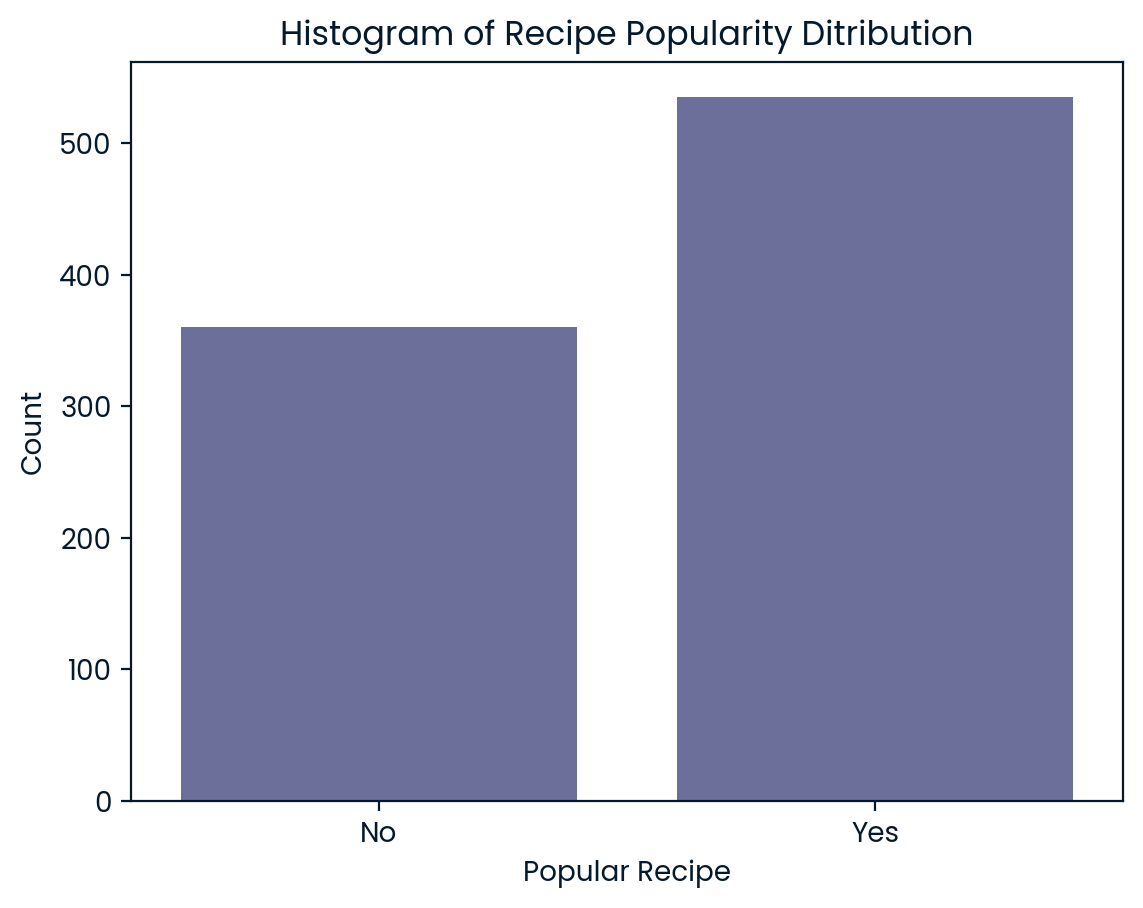

In [8]:
# After dropping rows with NaN values, let us visualize the outcome variable distribution to see if there is enough information on both popuplar and non-popular recipes
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df, x='high_traffic')
plt.title('Histogram of Recipe Popularity Ditribution')
plt.xlabel('Popular Recipe')
plt.ylabel('Count')
plt.xticks([0,1],['No', 'Yes'])
plt.show()

In [9]:
# The recipe column is redundant and not necessary for our analysis, so drop it
df.drop(columns='recipe', inplace=True)

In [10]:
# Lets check if anything seems to be weird. The table is not too big, so some visual exploration is okay to do
df

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,35.48,38.56,0.66,0.92,Potato,4,1
2,914.28,42.68,3.09,2.88,Breakfast,1,0
3,97.03,30.56,38.63,0.02,Beverages,4,1
4,27.05,1.85,0.80,0.53,Beverages,4,0
5,691.15,3.46,1.65,53.93,One Dish Meal,2,1
...,...,...,...,...,...,...,...
941,186.21,83.94,1.98,22.40,Chicken Breast,4,1
942,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,0
944,951.74,29.42,3.57,13.87,Pork,2,1
945,266.61,35.77,0.97,8.07,Potato,6,1


In [11]:
# The servings column should be numerical (currently is categorical) and should not contain extra info (sometimes includes 'as a snack' string, which is redundant). Fixing this here.
df['servings'] = df['servings'].str.strip(' as a snack')
df['servings'] = df['servings'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      895 non-null    object 
 5   servings      895 non-null    int64  
 6   high_traffic  895 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 88.2+ KB


### Exploring the calories column
After looking at the table for some time, the calories column has some obvious flaws. Many of the entries seem wrong, judged by my knowledge about calories and food. So, either there were mistakes putting the calories data in the file, or the other columns showing the macro nutrients are faulty. I don't know the source of the problem, so I cannot do much about it except noticing it and pointing it out in the report/presentation. For the sake of trying to understand the problem in more detail, I want to visualize the calories values.

Below it can be seen that many entries have very low calories.

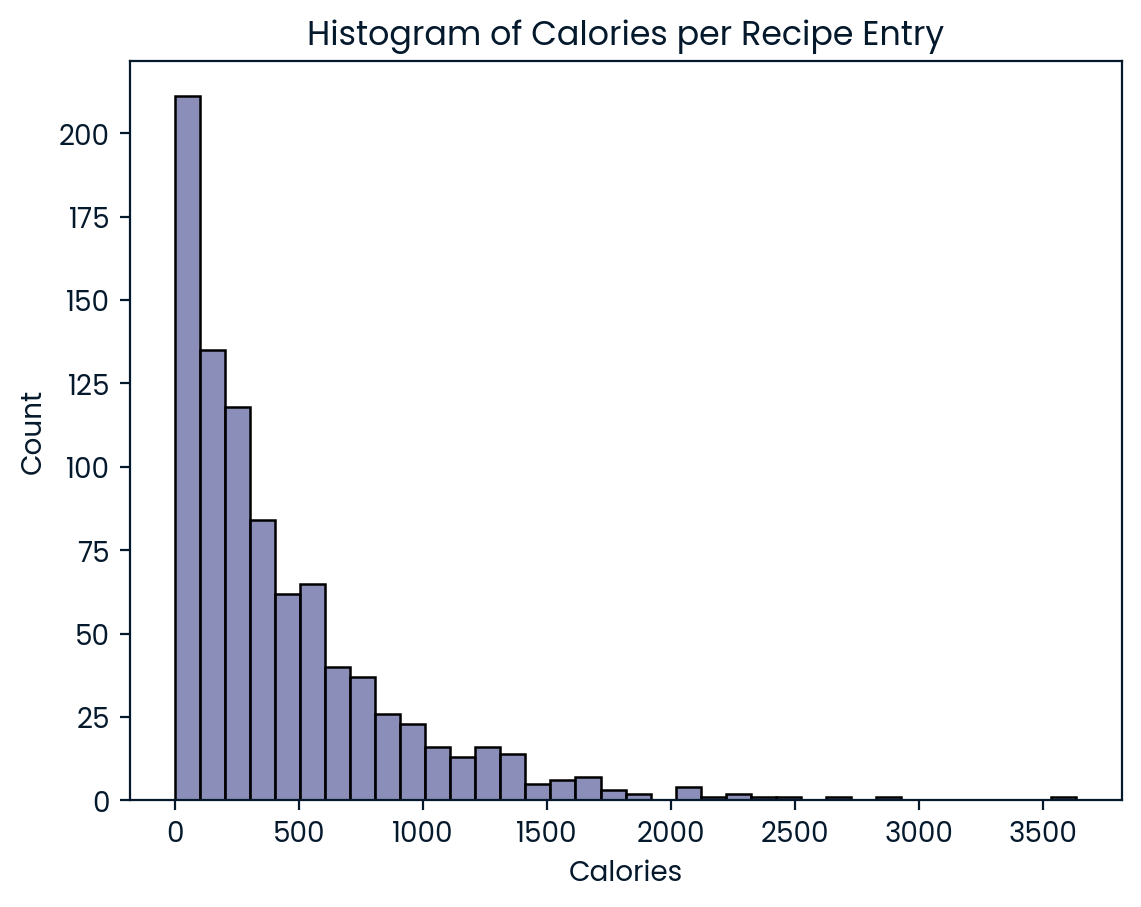

In [13]:
sns.histplot(data=df, x='calories')
plt.title('Histogram of Calories per Recipe Entry')
plt.xlabel('Calories')
plt.show()

This is, not yet, concerning, because many beverages or vegetable dishes might have very low calories skewing the data. Let us visualize the distribution of calories per food category to dive deeper. 

Results below show that in all categories very low calories entries can be found. This is very suspicious. Possible explanations about this are the following: 
- The data quality might be low and there were mistakes in either making entries in the table during the data collection process or mistakes during the table saving process
- The calories column itself might not be the true problem, but mistakes in other columns that make the calories seem suspicious.

More exploration about the source of this problem is necessary, because it also impacts the machine learning model performance!

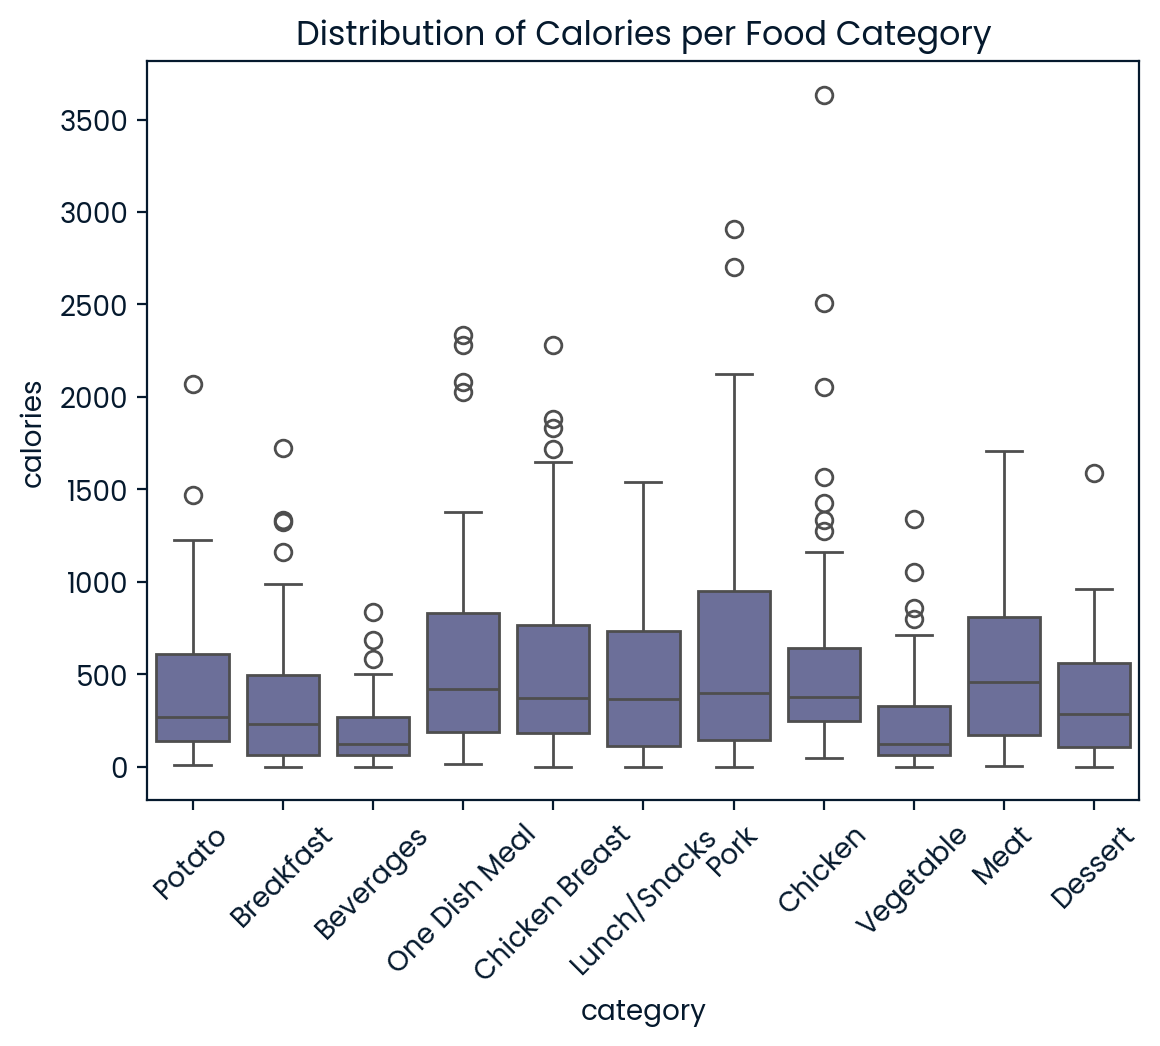

In [14]:
# Many entries with very low calories. Is this only because there are so many beverage or vegetable recipes on the website or is there something wrong with the data?
# Now visualizing per food category - maybe there are food categories with more faulty data

sns.boxplot(data=df, x='category', y='calories')
plt.title('Distribution of Calories per Food Category')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Thoughts on this visualization: It is clear that the calorie data is faulty across food categories. Calorie values close to 0 are present in every category and are very doubtful (except for the beverages category). Also, those values close to 0 are not even indicated by outliers in the boxplots, so that means those mistakes do not happen seldomly. For the sake of the continuation of the project and missing information about the source of the faulty data, I will continue my analysis with what I have. I assume those calory numbers are displayed on the website like they are displayed in the table, so in that case it still makes sense to use it as a predictor in my analysis. Also, I am making the assumption that the number values about calories and macro nutrients are per serving.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      895 non-null    object 
 5   servings      895 non-null    int64  
 6   high_traffic  895 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 88.2+ KB


In [17]:
# Checking the category column to see if there are mistakes
df['category'].unique()

array(['Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Pork', 'Chicken', 'Vegetable',
       'Meat', 'Dessert'], dtype=object)

In [18]:
# According to the data information I got, there should not be a Chicken Breast column, but only a chicken column, so I will change all Chicken Breast Values to Chicken.
df['category'] = df['category'].str.replace('Chicken Breast', 'Chicken')
df['category'].unique()

array(['Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken',
       'Lunch/Snacks', 'Pork', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [19]:
# Before starting with the analysis, there is one missing step that needs to be done. Converting the category column in numerical (dummy) values, so that I can use the whole table for my machine learning approach.
df_clean = pd.get_dummies(df, columns=['category'])
df_clean

,calories,carbohydrate,sugar,protein,servings,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
1,35.48,38.56,0.66,0.92,4,1,0,0,0,0,0,0,0,0,1,0
2,914.28,42.68,3.09,2.88,1,0,0,1,0,0,0,0,0,0,0,0
3,97.03,30.56,38.63,0.02,4,1,1,0,0,0,0,0,0,0,0,0
4,27.05,1.85,0.80,0.53,4,0,1,0,0,0,0,0,0,0,0,0
5,691.15,3.46,1.65,53.93,2,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,186.21,83.94,1.98,22.40,4,1,0,0,1,0,0,0,0,0,0,0
942,1161.00,5.31,22.39,44.22,2,0,0,0,0,0,1,0,0,0,0,0
944,951.74,29.42,3.57,13.87,2,1,0,0,0,0,0,0,0,1,0,0
945,266.61,35.77,0.97,8.07,6,1,0,0,0,0,0,0,0,0,1,0


## Model Fitting and Evaluation
Predicting the popularity of a recipe is a classification problem. 
I am choosing the Logistic Regression model as the baseline model, because it can capture the relationship between our numerical independent variables and our categorical dependent variable well.
As the comparison model I chose the RandomForestClassifier, because it can be a more complex model dealing with classification problems.

For the evaluation I use the model accuracy to get an idea about how well the models perform. The accuracy calculates accurate predictions devided by all predictions.

### Preparing the data for modeling
- categorical columns were already made numerical
- the independent values and dependent values were extracted from the table
- the data set was split to have both a training set, that is used to train the machine learning models, and a test set, that is used to assess the model performances

In [20]:
# Extracting x and y values from the clean df
y = df_clean['high_traffic'].values
X = df_clean.drop(columns='high_traffic').values

In [21]:
# Preprocessing completed! Lets start the machine learning process.
# Lets build our benchmark model. Its a classification, so the simplest model is the Logistic Regression model. Also importing train_test_split, because its necessary for model creation and model performance assessment.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29, stratify=y)

### The baseline model
The baseline model was created and we found an accuracy of 0.75, meaning out of all predictions this model made, 75% were correct predictions.

In [22]:
# Launching the baseline model
logreg = LogisticRegression(random_state=29)
logreg.fit(X_train, y_train)
# Calculating the model score (accuracy). This is necessary for model evaluation. No cross-validation because of limited time.
logreg.score(X_test, y_test)

0.75

### Evaluate by business criteria
The questions/tasks provided to me were the following:
First:
- 'They want us to predict which recipes will be popular 80% of the time'
This can be interpreted as the metric 'recall', which means: Of all popular recipes, what fraction did you correctly recommend? To calculate the recall, this formula was applied: TP / (TP + FN) where TP: True Positives, and FN: False Negatives.
Our baseline model had a recall value of around 0.828. This means it predicts which recipes will be popular 82.8% of the time

Second:
- 'minimize the chance of showing unpopular recipes'
This can be interpreted as the metric 'precision', which means: Among recipes you predicted as popular, what fraction were actually popular? To calculate the precision, this formula was applied: TP / (TP + FP) where FP: False Positives (so recipes that were predicted as popular but were truly unpopular)
Our baseline model had a recall value of around 0.771. This means: Among all recipes that were predicted popular, 77.1% were truly popular.

Conclusion:
Using this model will predict which recipes will be popular 82.8% of the time and minimize the chance of showing unpopular recipes to 22.9%.

In [23]:
# Now defining KPI's to assess model performance to business criteria
# First: 'They want us to predict which recipes will be popular 80% of the time' - this is interpreted as the recall, so in other words: Of all popular recipes, what fraction did you correctly recommend? - The formula is this: TP / (TP + FN) where TP: True Positives, and FN: False Negatives
#Second: 'minimize the chance of showing unpopular recipes' -  this is interpreted as the precision, so in other words: Among recipes you predicted as popular, what fraction were actually popular? - The formula is this: TP / (TP + FP) where FP: False Positives (so recipes that were predicted as 'high traffic' but were truly 'low traffic')
y_pred_baseline = logreg.predict(X_test)

from sklearn.metrics import precision_score, recall_score

precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)

print("Baseline Model Precision:", precision_baseline)
print("Baseline Model Recall:", recall_baseline)

Baseline Model Precision: 0.7708333333333334
Baseline Model Recall: 0.8283582089552238


Below, feature importances of our baseline model can be seen. Our Logistic Regression model suggests that, if isolated, food categories are the best predictors for popularity of recipes. It seems like vegetable, potato and pork recipes are the most popular (in that order) and beverages, breakfast, and chicken recipes are the least popular (in that order).

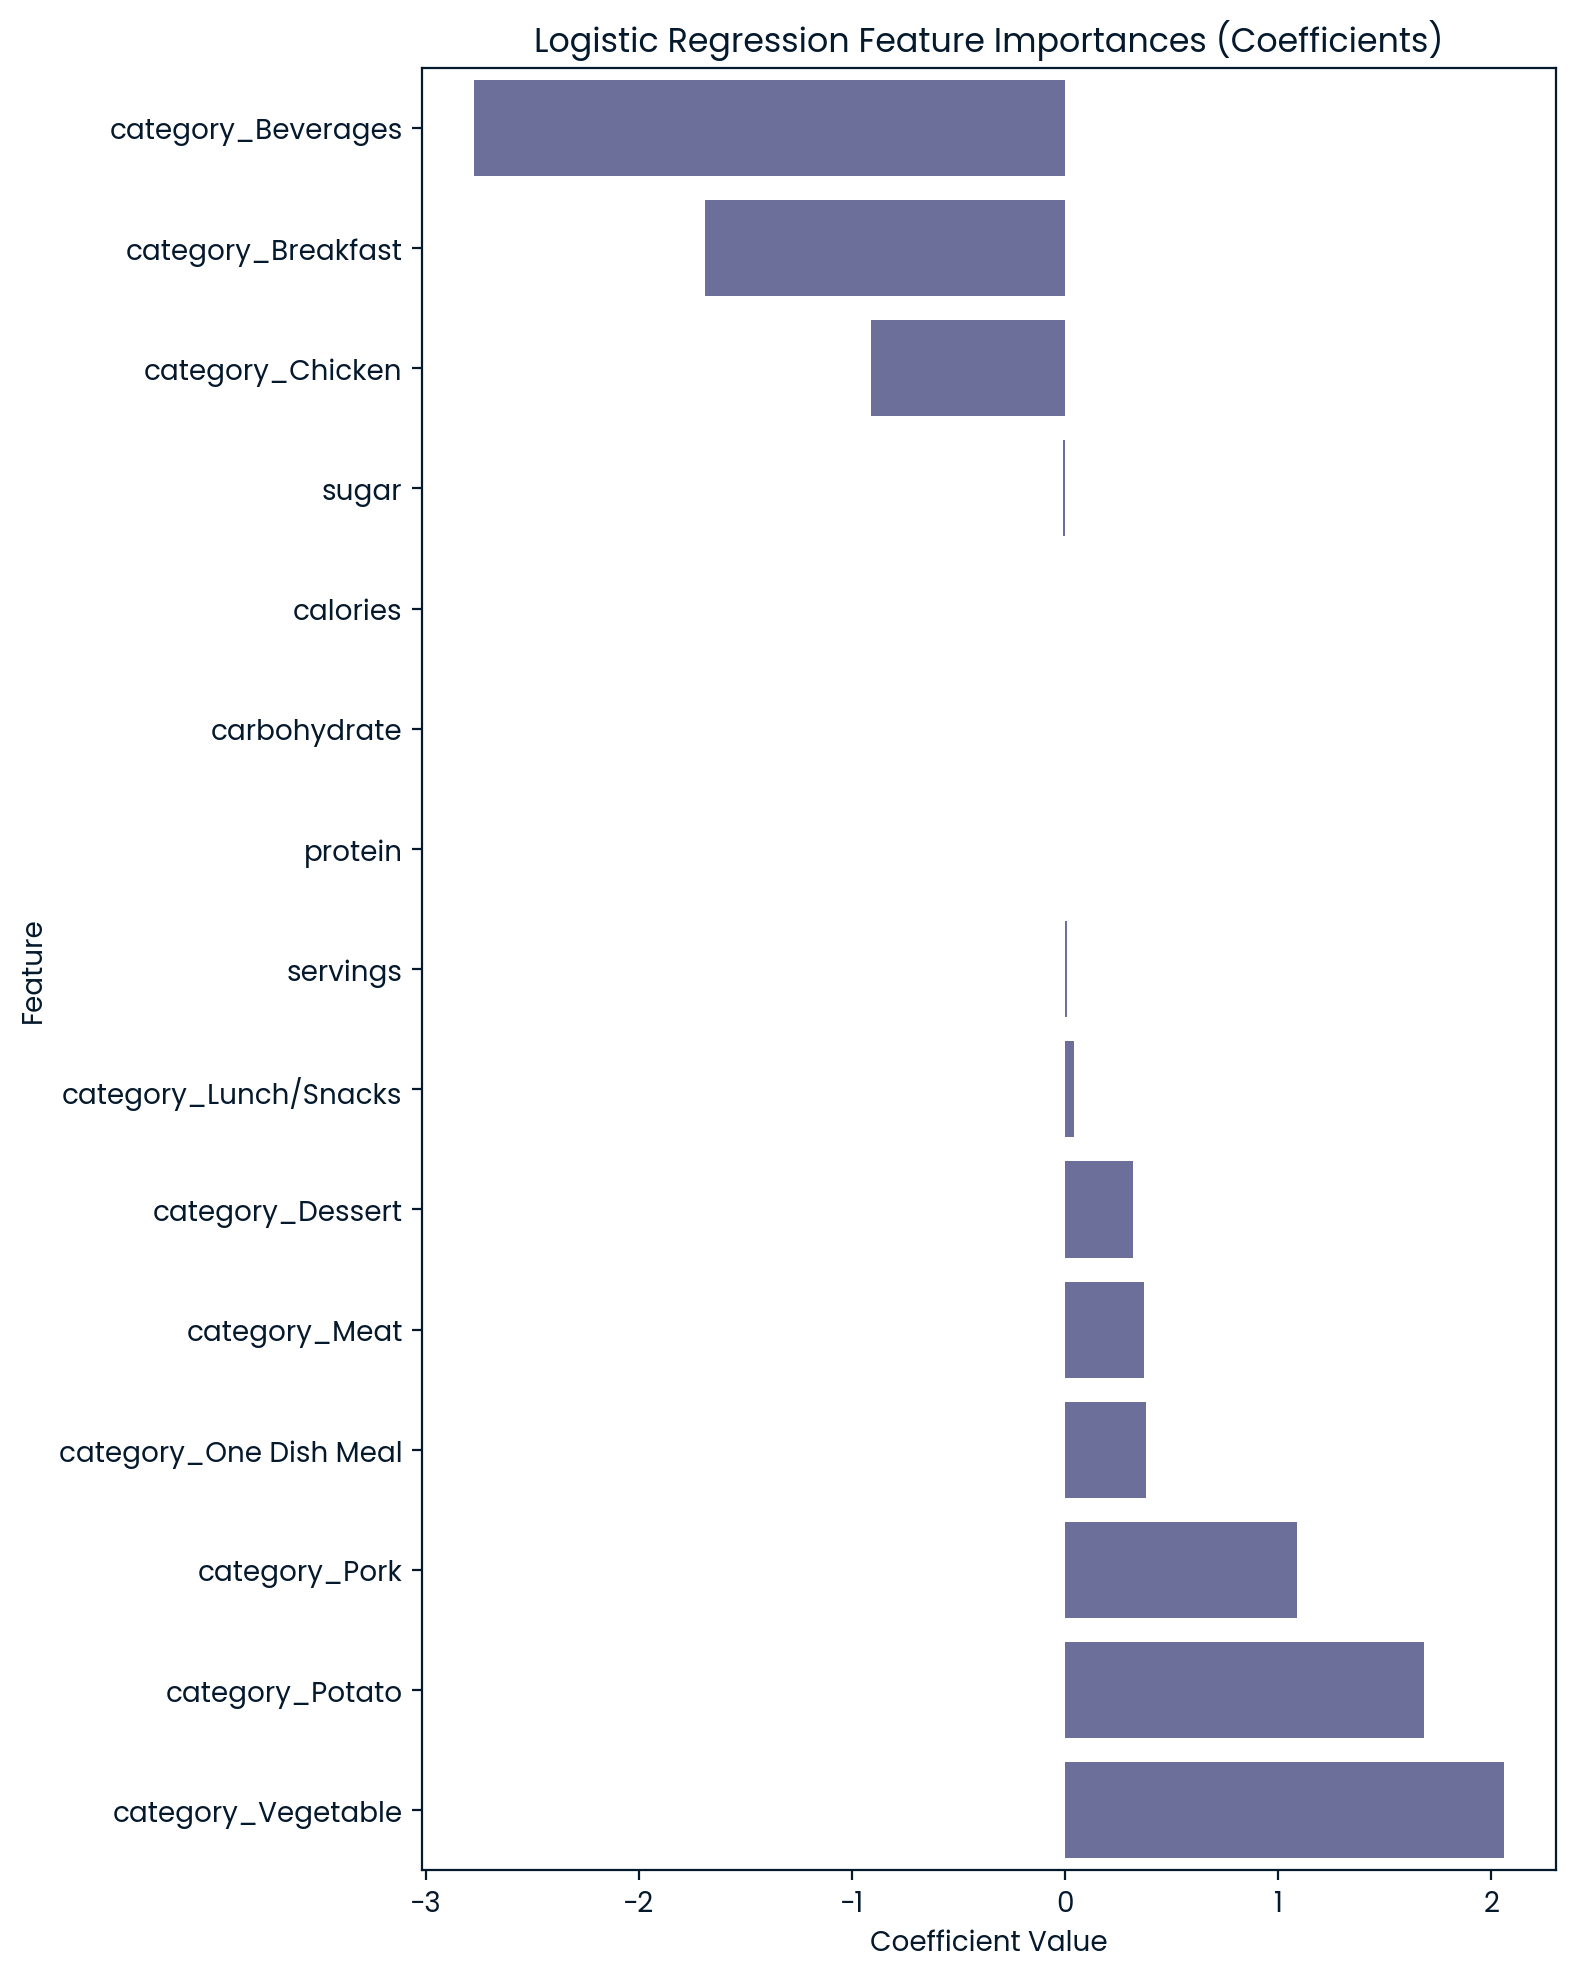

In [24]:
# Visualizing feature importances for baseline model
# Extracting feature importances and assigning them to corresponding column names
coefficients = logreg.coef_[0]
feature_importances = pd.Series(coefficients, index=df_clean.drop(columns='high_traffic').columns)
feature_importances = feature_importances.sort_values()

# Creating the barplot
plt.figure(figsize=(8, 10))
sns.barplot(x=feature_importances.values, y=feature_importances.index)

plt.title("Logistic Regression Feature Importances (Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [25]:
"""
Thoghts on feature importances:
Interesting! 
- macro nutrient information, servings, and calories have almost no (!) impact on model accuracy. So, those values do not matter when it comes to popular/ non-popular recipes!
- it is more likely a recipe is popular if they are in those food categories (in that order): Vegetable, Potato, Pork
- it is less likely a recipe is popular if they are in those food categories (in that order): Beverages, Breakfast, Chicken
"""

'\nThoghts on feature importances:\nInteresting! \n- macro nutrient information, servings, and calories have almost no (!) impact on model accuracy. So, those values do not matter when it comes to popular/ non-popular recipes!\n- it is more likely a recipe is popular if they are in those food categories (in that order): Vegetable, Potato, Pork\n- it is less likely a recipe is popular if they are in those food categories (in that order): Beverages, Breakfast, Chicken\n'

### The comparison model
The comparison model was created and we found an accuracy of 0.73, meaning out of all predictions this model made, 73% were correct predictions.

In [26]:
# Now creating the comparison model. I am choosing the Random Forest Classifier, because it is a more complex model, that should better predict the outcome variable

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth = 10, random_state=29)
forest.fit(X_train, y_train)
# Calculating the model score (accuracy). This is necessary for model evaluation. No cross-validation because of limited time.
forest.score(X_test, y_test)

0.7276785714285714

### Evaluate by business criteria
The recall of our comparison model was around 0.87.
The precision of our comparison model was around 0.73.

So, it performs better than our baseline model in terms of recall, but worse in terms of precision.

Conclusion:
Using this model will predict which recipes will be popular 87% of the time and minimize the chance of showing unpopular recipes to 27%.

In [27]:
y_pred_comparison = forest.predict(X_test)

precision_comparison = precision_score(y_test, y_pred_comparison)
recall_comparison = recall_score(y_test, y_pred_comparison)

print("Comparison Model Precision:", precision_comparison)
print("Comparison Model Recall:", recall_comparison)

Comparison Model Precision: 0.7295597484276729
Comparison Model Recall: 0.8656716417910447


Below, the comparison model feature importances can be seen. It is interesting to see that the column that was criticized the most because of its values (calories) is the second most important feature in the model predicting whether a recipe is popular or not. This indicates that this model might not be ideal in this particular setting.

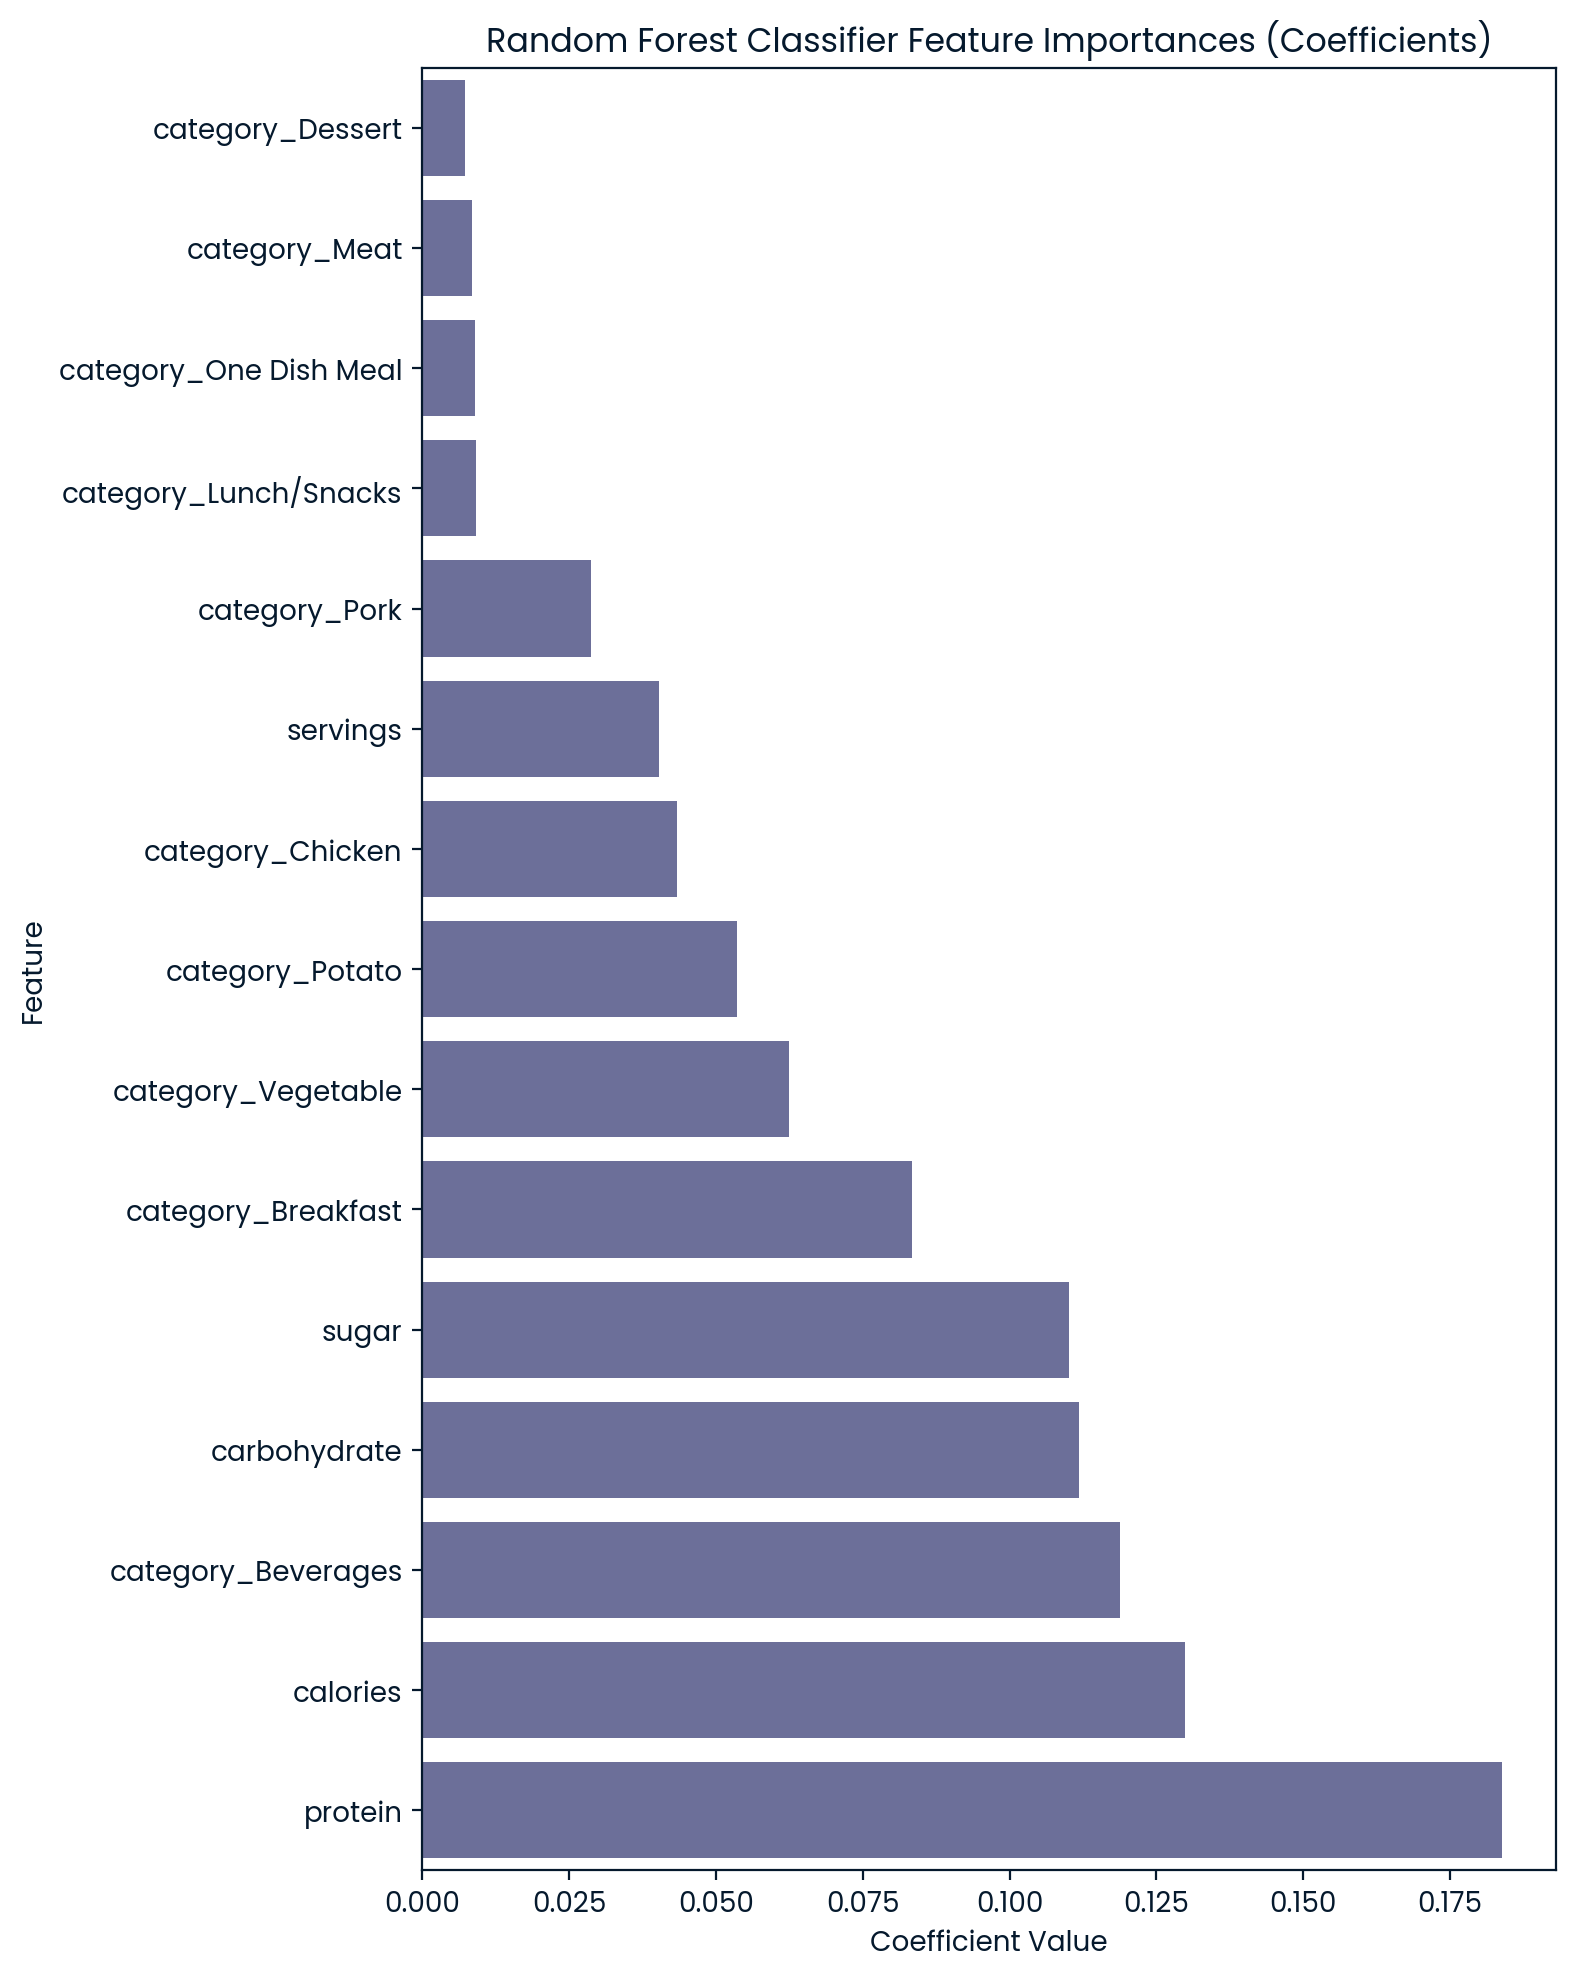

In [28]:
# Visualizing feature importances for comparison model
# Extracting feature importances and assigning them to corresponding column names
coefficients = forest.feature_importances_
feature_importances = pd.Series(coefficients, index=df_clean.drop(columns='high_traffic').columns)
feature_importances = feature_importances.sort_values()

# Creating the barplot
plt.figure(figsize=(8, 10))
sns.barplot(x=feature_importances.values, y=feature_importances.index)

plt.title("Random Forest Classifier Feature Importances (Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Recommendations:
- First, I want to check for the possibility to increase data quality. Not only is the calories column highly suspicious to display valid values, but also there could be additional information about the data. Some information that was missing was: Are the calories already calories per serving or should I divide the calories per serving size, so that I get calories per serving? Is it possible to add to the table fat values? There are information about all macro nutrients except fat.
- The baseline model suggests vegetable, potato, and pork recipes are more popular on your website, so consider taking that into account when deciding what recipes to show
- In turn, beverages, breakfast, and chicken recipes are less popular
- If we can find a solution on the data quality problem, I want to tackle the task again and create even more accurate models with more effort and more time ressources
- Bottom line: Even though the models I created already perform quite well based on the business metrics, there is still a lot of room for improvement!
- Ultimately: Use the models I created to predict popularity of recipes to aid the process of deciding which recipes to show!